In [63]:
from load_annotations import AnnotationLoader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [64]:
LOG_PATH = "/Users/ruhana/Agent-E/new_ruhana_notes/All/logs/test_results_for_full_text/"
RESULT_PATH = "/Users/ruhana/Agent-E/new_ruhana_notes/All/results/results_for_test_full_text/"
self_refine_annotations = AnnotationLoader(LOG_PATH, RESULT_PATH)

# Load final results as a dataframe
self_refine_results = self_refine_annotations.get_all_annotation_results()
self_refine_results.columns

Index(['task_id', 'task_index', 'start_url', 'intent', 'last_url', 'tct',
       'start_ts', 'completion_ts', 'last_statement',
       'validator_last_statement', 'score', 'reason', 'validate_score',
       'validate_reason', 'screenshot_rate', 'validation_count',
       'total_main_chat_token', 'main_chat_length', 'total_trajectory_length'],
      dtype='object')

In [65]:
all_self_refinement_results = {}

for mode in ["text", "vision", "text_vision"]:
    LOG_PATH = f"/Users/ruhana/Agent-E/new_ruhana_notes/All/logs/test_results_for_full_{mode}/"
    RESULT_PATH = f"/Users/ruhana/Agent-E/new_ruhana_notes/All/results/results_for_test_full_{mode}/"
    annon_loader = AnnotationLoader(LOG_PATH, RESULT_PATH)
    all_self_refinement_results[mode] = annon_loader.get_all_annotation_results()
    print(len(all_self_refinement_results[mode]))

392
455
[Errno 2] No such file or directory: '/Users/ruhana/Agent-E/new_ruhana_notes/All/logs/test_results_for_full_text_vision/logs_for_task_382/execution_logs_382.json'
[Errno 2] No such file or directory: '/Users/ruhana/Agent-E/new_ruhana_notes/All/logs/test_results_for_full_text_vision/logs_for_task_556/execution_logs_556.json'
471


In [66]:
LOG_PATH = "/Users/ruhana/Agent-E/ruhana_notes/baseline_annotated/original_annotations/All/logs"
RESULT_PATH = "/Users/ruhana/Agent-E/ruhana_notes/baseline_annotated/original_annotations/All/results"
original_annotation = AnnotationLoader(LOG_PATH, RESULT_PATH)

# Load final results as a dataframe
original_results = original_annotation.get_all_annotation_results()
original_results.columns

# make sure original matches the same subset!!!
self_refine_task_id = list(self_refine_results['task_id'])
original_results = original_results[original_results['task_id'].isin(self_refine_task_id)]

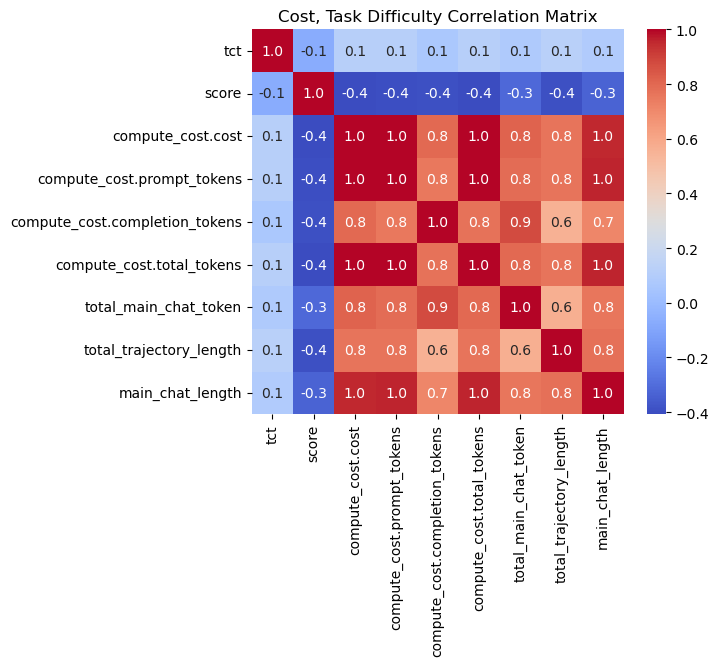

In [67]:
original_subset = original_results[['tct',
       'score', 'compute_cost.cost', 'compute_cost.prompt_tokens',
       'compute_cost.completion_tokens', 'compute_cost.total_tokens',
       'total_main_chat_token', 'total_trajectory_length', 'main_chat_length']]
correlation_matrix = original_subset.corr()

# Plotting the correlation matrix using matplotlib
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Cost, Task Difficulty Correlation Matrix")
plt.show()

In [68]:
# Do harder tasks have longer trajectories?
# avg(trajectory length), avg(start_url), failed cases, not failed cases...
# honestly, i dont think time completion is the best metric of difficulty....
# are long-horizon tasks the hardest??? well how would we know?

# average trajectory legnth and score 
# why do failure cases have long trajectories?
original_subset = original_results[['start_url', 'tct',
       'score', 'compute_cost.cost', 'compute_cost.prompt_tokens',
       'compute_cost.completion_tokens', 'compute_cost.total_tokens',
       'total_main_chat_token', 'total_trajectory_length', 'main_chat_length']]
original_by_url = original_subset.groupby('start_url').mean()

self_refine_subset = self_refine_results[['start_url', 'tct',
       'score','total_main_chat_token', 'total_trajectory_length', 'main_chat_length']]
self_refine_by_url = self_refine_subset.groupby('start_url').mean()

print(f"Agent-E Acc: {original_results['score'].mean()}\nSelf-Refine: {self_refine_subset['score'].mean()}")

Agent-E Acc: 0.7474489795918368
Self-Refine: 0.8137755102040817


In [69]:
self_refine_by_url

,tct,score,total_main_chat_token,total_trajectory_length,main_chat_length
start_url,,,,,
https://arxiv.org/,419.870498,0.900000,1080.800000,22.433333,16.100000
https://dictionary.cambridge.org/,74.742042,0.906250,567.031250,12.875000,11.218750
https://github.com/,156.935616,1.000000,882.500000,29.850000,17.300000
https://huggingface.co/,185.011857,0.700000,1282.500000,40.100000,18.450000
https://www.allrecipes.com/,124.219709,0.823529,924.588235,22.088235,15.294118
https://www.amazon.com/,656.315920,0.900000,1618.100000,33.633333,21.066667
https://www.apple.com/,272.389895,0.937500,663.500000,25.593750,13.750000
https://www.bbc.com/news/,166.426142,0.896552,935.137931,14.413793,13.172414
https://www.booking.com/,849.937499,0.303030,1267.636364,48.454545,18.121212


original_by_url

15 15


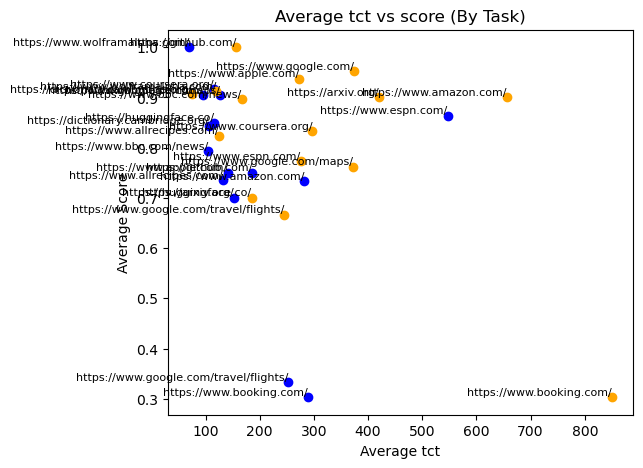

15 15


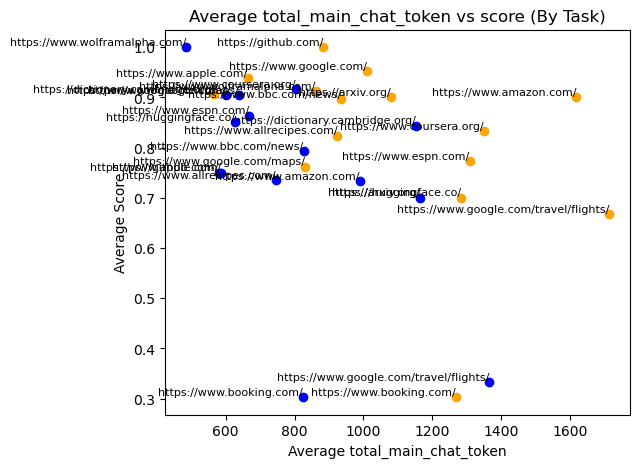

15 15


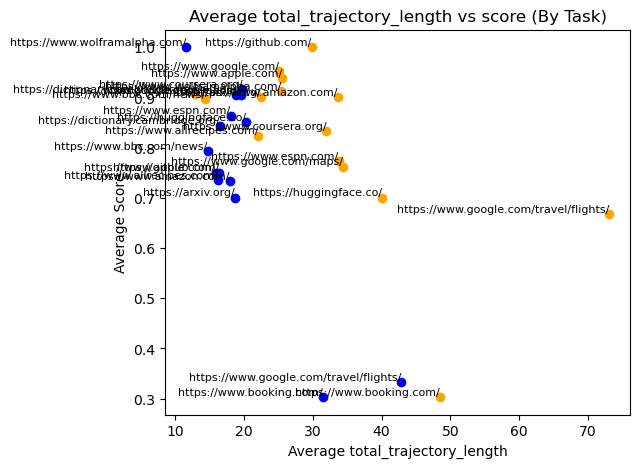

In [70]:
x_axis = ['tct', 'total_main_chat_token', 'total_trajectory_length']

for column in x_axis:
    plt.figure(figsize=(6, 5))

    # Check the lengths to ensure they match
    print(len(original_by_url[column]), len(original_by_url['score']))

    # Plot each column individually against the 'score'
    plt.scatter(original_by_url[column], original_by_url['score'], color="blue")
    plt.scatter(self_refine_by_url[column], self_refine_by_url['score'], color="orange")
    
    #Adding text labels for each point (if needed)
    for df in [original_by_url, self_refine_by_url]:
        for start_url, x, y in zip(df.index, df[column], df['score']):
            plt.text(x, y, start_url, fontsize=8, ha='right', va='bottom')
    
    plt.xlabel(f'Average {column}')
    plt.ylabel('Average Score')
    plt.title(f'Average {column} vs score (By Task)')
    plt.show()

In [71]:
# Do longer tasks have longer trajectories?

# How about when we look at it by start_url?
original_subset = original_results[['tct',
       'score', 'compute_cost.cost', 'compute_cost.prompt_tokens',
       'compute_cost.completion_tokens', 'compute_cost.total_tokens',
       'total_main_chat_token', 'total_trajectory_length']]
positive_only = original_subset[original_subset['score'] == 1.0].mean()#.groupby('start_url').mean()
negative_only = original_subset[original_subset['score'] == 0.0].mean()#.groupby('start_url').mean()

In [72]:
# if we care about cost, then we care about main chat length, and trajectory length then...

In [73]:
# can we make the long-trajectories more efficient, take less steps?
# where the main chat is long, can we make it more efficient

# scenario one: we can make incorrect trajectories correct with with feedback (works!)
# scenario two: we can make correct trajectories more efficient the next time around! <- cases where validator helps 
# scenario three: we can get similar tasks to work (transfer to similar tasks)

In [74]:
# scenario 1: all cases where validation was called and the score was improved!
# This shows that refinement can be used to improve a trajectory 
validation_called = [8, 26, 52, 56, 58, 59, 62, 64, 66, 68, 70, 75, 76, 78, 81, 88, 97, 130, 136, 137, 
                     138, 140, 146, 164, 169, 182, 192, 200, 208, 211, 233, 264, 276, 305, 312, 318, 324, 
                     350, 360, 388, 398, 410, 460, 484, 490, 506, 508, 524, 534, 542, 544, 558, 570, 576, 
                     596, 604, 642]

In [75]:
# scenario 2: 
# Trajectory is long by correct
ineffecient_tasks = original_results[original_results['score'] == 1.0].sort_values(by='main_chat_length', ascending=False)[:20]
ineffecient_task_ids = list(ineffecient_tasks['task_id'])
ineffecient_tasks

,task_id,task_index,start_url,intent,last_url,tct,start_ts,completion_ts,last_statement,score,reason,compute_cost.cost,compute_cost.prompt_tokens,compute_cost.completion_tokens,compute_cost.total_tokens,total_main_chat_token,main_chat_length,total_trajectory_length
0,470,470,https://www.google.com/maps/,Find 5 beauty salons with ratings greater than...,https://www.google.com/maps/place/Liana+Hair+S...,391.612847,2024-06-19 10:09:26,2024-06-19 10:16:00,There was a misunderstanding in the process. W...,1.0,None,0.53763,50271.0,1164.0,51435.0,1264,30,51
0,556,556,https://huggingface.co/,Discover three new and popular open-source NLP...,https://huggingface.co/models?pipeline_tag=tra...,215.501195,2024-06-18 19:46:49,2024-06-18 19:50:25,The three new and popular open-source NLP mode...,1.0,None,0.16093,14410.0,561.0,14971.0,1639,30,73
0,185,185,https://www.bbc.com/news/,Search for recent news related to Trump and su...,https://www.bbc.com/news/articles/cjqqkjy41zno,293.261855,2024-06-18 15:49:06,2024-06-18 15:54:01,Here are the summaries of the recent news rela...,1.0,None,0.49021,46129.0,964.0,47093.0,2460,26,37
0,60,60,https://www.amazon.com/,"Find a pair of mens running shoes in black, si...",https://www.amazon.com/cart/smart-wagon?newIte...,513.355742,2024-06-19 09:41:39,2024-06-19 09:50:14,The selected pair of men's running shoes in bl...,1.0,None,0.45685,43366.0,773.0,44139.0,1101,26,38
0,266,266,https://dictionary.cambridge.org/,"Find three different meanings of ""dog"" in Camb...",https://dictionary.cambridge.org/dictionary/en...,216.748664,2024-06-15 03:01:05,2024-06-15 03:04:45,"The task to find three different meanings of ""...",1.0,None,0.48434,42497.0,1979.0,44476.0,2660,26,28
0,446,446,https://www.google.com/travel/flights/,Compare flight options from New York to Tokyo ...,https://www.google.com/travel/flights/search?t...,184.011959,2024-06-18 23:23:54,2024-06-18 23:26:59,"The top 3 flights from New York to Tokyo, sort...",1.0,None,0.45045,42540.0,835.0,43375.0,1381,26,39
0,290,290,https://dictionary.cambridge.org/,"Search for the differences between ""fewer"" and...",https://dictionary.cambridge.org/grammar/briti...,202.126251,2024-06-15 04:07:00,2024-06-15 04:10:23,"The differences between ""fewer"" and ""less"" as ...",1.0,None,0.48353,40889.0,2488.0,43377.0,2963,24,28
0,289,289,https://dictionary.cambridge.org/,Look up the use of modal verbs in grammar sect...,https://dictionary.cambridge.org/grammar/briti...,181.741524,2024-06-15 04:03:23,2024-06-15 04:06:26,We have successfully collected examples of sen...,1.0,None,0.42923,37628.0,1765.0,39393.0,2561,24,27
0,434,434,https://www.google.com/travel/flights/,Search for a flight on December 19 and return ...,https://www.google.com/travel/flights/search?t...,188.495902,2024-06-18 22:16:08,2024-06-18 22:19:17,The search for flights from Tel Aviv to Venice...,1.0,None,0.36710,34508.0,734.0,35242.0,1068,24,39
0,504,504,https://www.google.com/maps/,Find a hiking trail within 2 miles of zip code...,"https://www.google.com/maps/dir/Denver,+CO+802...",254.570595,2024-06-19 14:37:56,2024-06-19 14:42:12,"Based on the available information, all listed...",1.0,None,0.38598,36132.0,822.0,36954.0,923,24,49


In [76]:
original_wrong = set(original_results[original_results['score'] == 0.0]['task_id'])
original_correct = set(original_results[original_results['score'] == 1.0]['task_id'])
refiner_correct = set(self_refine_results[self_refine_results['score'] == 1.0]['task_id'])
refiner_wrong = set(self_refine_results[self_refine_results['score'] == 0.0]['task_id'])

improved_tasks = list(refiner_correct - original_correct)
print(f"{len(improved_tasks)}/{len(refiner_wrong) + len(refiner_correct)}")

improved_tasks_df = original_results[original_results['task_id'].isin(improved_tasks)].sort_values(by='task_id', ascending=True)
url_counts = improved_tasks_df['start_url'].value_counts()
url_counts

64/392


start_url
https://www.google.com/travel/flights/    9
https://www.amazon.com/                   7
https://www.apple.com/                    7
https://arxiv.org/                        7
https://www.allrecipes.com/               6
https://www.bbc.com/news/                 5
https://www.booking.com/                  5
https://github.com/                       5
https://dictionary.cambridge.org/         4
https://www.espn.com/                     3
https://www.coursera.org/                 2
https://huggingface.co/                   2
https://www.google.com/maps/              1
https://www.google.com/                   1
Name: count, dtype: int64

In [77]:
# Merge the two dataframes on 'task_id'
merged = pd.merge(self_refine_by_url, original_by_url, on='start_url', suffixes=('_refine', '_original'))

# Calculate the score difference
merged['score_diff'] = merged['score_refine'] - merged['score_original']
merged['score_diff'] = merged['score_diff'] * 100
merged[['score_diff']].sort_values(by='score_diff', ascending=False)
# print(merged.columns)
# # Result
# print(merged[['start_url', 'score_diff']])

,score_diff
start_url,
https://www.google.com/travel/flights/,33.333333
https://github.com/,25.000000
https://arxiv.org/,20.000000
https://www.apple.com/,18.750000
https://www.amazon.com/,16.666667
https://www.bbc.com/news/,10.344828
https://www.allrecipes.com/,8.823529
https://dictionary.cambridge.org/,6.250000
https://www.google.com/,4.761905


In [78]:
#improved_tasks_df
improved_df_refine = self_refine_results[self_refine_results['task_id'].isin(improved_tasks)].sort_values(by='task_id', ascending=True)
improved_df_and_validation = self_refine_results[self_refine_results['validation_count'] > 1].sort_values(by='task_id', ascending=True)
improved_df_and_validation

,task_id,task_index,start_url,intent,last_url,tct,start_ts,completion_ts,last_statement,validator_last_statement,score,reason,validate_score,validate_reason,screenshot_rate,validation_count,total_main_chat_token,main_chat_length,total_trajectory_length
0,8,8,https://www.allrecipes.com/,Search for a recipe for Beef Wellington on All...,https://www.allrecipes.com/recipe/16899/beef-w...,173.166776,2024-08-26 10:46:44,2024-08-26 10:49:38,The main ingredients required for the 'Beef We...,The task was completed. The workflow was succe...,1.0,None,1.0,None,10/10,2,1352,27,36
0,26,26,https://www.allrecipes.com/,Search for a high-protein vegetarian chili rec...,https://www.allrecipes.com/recipe/72508/the-be...,364.082471,2024-08-26 13:03:51,2024-08-26 13:09:56,I found a highly rated vegetarian chili recipe...,The task was completed. The workflow was succe...,1.0,None,1.0,None,10/10,2,2321,23,34
0,49,49,https://www.amazon.com/,Find the used Nintendo Switch Lite on Amazon t...,https://www.amazon.com/s?k=Nintendo+Switch+Lit...,1265.826734,2024-09-05 16:56:41,2024-09-05 17:17:49,The cheapest 'Used - Good' Nintendo Switch Lit...,The task was completed. The workflow was succe...,1.0,None,1.0,None,0/8,3,1580,21,19
0,52,52,https://www.amazon.com/,Browse the women's hiking boots on Amazon and ...,https://www.amazon.com/Columbia-Womens-Newton-...,282.284956,2024-08-14 19:41:04,2024-08-14 19:45:48,The Columbia Women's Newton Ridge Lightweight ...,The task was completed. The workflow was succe...,1.0,None,1.0,None,10/10,2,1404,18,19
0,56,56,https://www.amazon.com/,Find a stainless steel kitchen sink with doubl...,https://www.amazon.com/s?k=stainless+steel+kit...,455.780487,2024-08-14 20:15:58,2024-08-14 20:23:35,The cheapest stainless steel kitchen sink with...,The task was completed. The workflow was succe...,1.0,None,1.0,None,16/16,2,1070,22,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,576,576,https://huggingface.co/,Identify the steps to convert a PyTorch model ...,https://huggingface.co/docs/transformers/main/...,497.512735,2024-08-26 16:44:17,2024-08-26 16:52:35,The official Hugging Face documentation provid...,The task was completed. The workflow was succe...,1.0,None,1.0,None,60/60,3,2981,47,80
0,588,588,https://huggingface.co/,List the benefits of hugging face classroom me...,https://huggingface.co/docs/hub/en/index#organ...,123.413264,2024-08-26 17:53:05,2024-08-26 17:55:09,"The 'Hugging Face for Classrooms' initiative, ...",The task was completed. The user successfully ...,0.0,The agent did not exactly locate the benefits ...,0.0,None,8/8,2,1066,15,28
0,596,596,https://huggingface.co/,Check the Dataset Viewer for ai2lumos/lumos_co...,https://huggingface.co/datasets/ai2lumos/lumos...,220.596949,2024-08-26 18:20:19,2024-08-26 18:24:01,Given the constraints and the feedback receive...,The task was completed. The workflow was succe...,1.0,None,1.0,None,20/20,3,1283,29,48
0,604,604,https://www.wolframalpha.com/,Give the final angle and final length after 6s...,https://www.wolframalpha.com/input?i=angle+of+...,148.281238,2024-08-26 18:37:24,2024-08-26 18:39:56,"After 6 seconds, the spring pendulum has a fin...",The task was completed. The workflow was succe...,1.0,None,1.0,None,8/8,2,1074,21,50


In [79]:
# can get all the annotators reasons
# can get all the validator reasons 

# basically, can run the validator on all these tasks....
# basically, this is just me running the validation experiment again....

# i should basically write out the code for the validation experiment and organize that, this is probably the most important part at this point....

# first though, lets look at the reasons that annotators were giving...

In [80]:
improved_df_original = original_results[original_results['task_id'].isin(improved_tasks)].sort_values(by='task_id', ascending=True)
improved_df_original[['start_url', 'intent','reason']]

,start_url,intent,reason
0,https://www.allrecipes.com/,Find a recipe for a vegetarian lasagna that ha...,All these recipes do not explicitly include zu...
0,https://www.allrecipes.com/,Find a recipe for a vegetarian lasagna under 6...,After reviewing the first three vegetarian las...
0,https://www.allrecipes.com/,Search for a recipe for Beef Wellington on All...,none of the recipes meet the specified criteri...
0,https://www.allrecipes.com/,Find a recipe for a vegetarian lasagna that ha...,The page does not directly address the initial...
0,https://www.allrecipes.com/,Find a popular quinoa salad recipe on Allrecip...,The search result doesn't meet the requirement...
...,...,...,...
0,https://www.google.com/travel/flights/,Search for round-trip flights from Helsinki to...,unable to filter the specified criteria
0,https://www.google.com/maps/,"Find all Uniqlo locations in Chicago, IL.","No requested webpage found, error"
0,https://www.google.com/,"Show me a list of comedy movies, sorted by use...",no actual results found
0,https://huggingface.co/,Look up TRL's forward modelling in the hugging...,Agent answer is empty


In [81]:
from openai import OpenAI
client = OpenAI()

data = improved_df_original[['start_url', 'intent','reason']].to_csv()
question = f"I need help analyzing my results from an experiment. In this experiment, I had a web-navigation agent accomplish many tasks on live websites. Each failure case was annotated by a real human with the reason for the web-navigator's failure. Help me analyze the failure cases. Please categorize the top-5 failure cases and give me examples of each. Think deeply about why each of these cases may occur and what causes each error type. Below is a csv file containing failure cases only. There are three columns: 1) start_url, which is the website the task was performed on 2) the intent, this is the task that the agent was given to perform and 3) the reason, this is the annotators' explaination for why the task failed: {data}"

completion = client.chat.completions.create(
            model="gpt-4",  # Specify the model (e.g., gpt-4 or gpt-3.5-turbo)
            messages=[
                {"role": "system", "content": "You are a helpful assistant."},
                {"role": "user", "content": question},
            ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content='Based on the data provided, the top 5 categories of failure cases can be grouped mainly into: \n\n1) **Insufficient Matching Criteria**\n \nExamples:\n- "Find a recipe for a vegetarian lasagna that has at least a four-star rating and uses zucchini."\n   \n- "Find a Blue iPhone 12 Pro 128gb and add to cart."\n\nReason: This happens when the agent couldn\'t find the requested information because the criteria were too specific or the task was beyond the capabilities of the agent. The agent requires enhancements in terms of advanced functionalities.\n\n2) **Failure in Filtering/Sorting/Comparing Data**\n\nExamples:\n- "Find a stainless steel kitchen sink with double bowls on Amazon. Sort the results and find the cheapest one with FREE delivery."\n\n- "Compare the prices and chips for the iPhone 14 Pro and iPhone 15 Pro models directly from Apple\'s website."\n\nReason: This error occurs when the agent fails to filter, sort, or compare data accurately due to t

In [135]:
import json
import os

directory = '/Users/ruhana/Agent-E/test/evaluator_results'
eval_files = []

for root, _, files in os.walk(directory):
    for file in files:
        eval_files.append(os.path.join(root, file))

for eval_file in eval_files:
    eval_file = f"/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json"
    with open(eval_file, 'r') as f:
        gpt_eval = json.load(f)
        gpt_eval = pd.json_normalize(gpt_eval)

    # first print the accuracy of each method 
    gpt_eval['validator_correct'] = gpt_eval['score'] == gpt_eval['pred_score']
    print(eval_file, gpt_eval['validator_correct'].mean())
    
    # of the cases that match, 

/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832
/Users/ruhana/Agent-E/test/evaluator_results/text_nested_chat_eval_gpt4o.json 0.374805598755832


In [138]:
def print_confusion(gpt_eval):
    true_positive = gpt_eval[(gpt_eval['pred_score'] == 1) & (gpt_eval['score'] == 1)]
    true_negative = gpt_eval[(gpt_eval['pred_score'] == 0) & (gpt_eval['score'] == 0)]
    false_positive = gpt_eval[(gpt_eval['pred_score'] == 1) & (gpt_eval['score'] == 0)]
    false_negative = gpt_eval[(gpt_eval['pred_score'] == 0) & (gpt_eval['score'] == 1)]
    print(len(true_positive), len(true_negative))
    print(len(false_positive), len(false_negative))
    gpt_eval['validator_correct'] = gpt_eval['score'] == gpt_eval['pred_score']
    print("Accuracy:", gpt_eval['validator_correct'].mean())
    return